### 1. Download dataset 

https://www.openml.org/search?type=data&sort=runs&status=active&id=1461

In [276]:
!wget -P ./data/ https://www.openml.org/data/download/1586218/phpkIxskf

--2024-11-11 07:42:51--  https://www.openml.org/data/download/1586218/phpkIxskf
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3660226 (3.5M) [text/plain]
Saving to: './data/phpkIxskf'

     0K .......... .......... .......... .......... ..........  1%  490K 7s
    50K .......... .......... .......... .......... ..........  2%  947K 5s
   100K .......... .......... .......... .......... ..........  4% 11.1M 4s
   150K .......... .......... .......... .......... ..........  5% 1.10M 3s
   200K .......... .......... .......... .......... ..........  6% 8.45M 3s
   250K .......... .......... .......... .......... ..........  8% 12.9M 2s
   300K .......... .......... .......... .......... ..........  9% 13.2M 2s
   350K .......... .......... .......... .......... .......... 11% 10.4M 2s
   400K .......... .......... .......... .......... ........

### 2.Prepare data

In [196]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

In [278]:
# LOAD DATASET INTO a DF

columns = [
    'age',
'job',
'marital',
'education',
'default',
'balance',
'housing',
'loan',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'target'
]


int_columns = [
    'age', 'day', 'campaign' , 'pdays' , 'previous', 'target'
]

float_columns = [
    'balance', 'duration'
]


# Load your ARFF file
data, meta = arff.loadarff('data/phpkIxskf')

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# To decode byte strings into ordinary strings 
df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

df.columns = columns


# cast coluimns to correct datatypes
for c in int_columns:
    df[c] = df[c].astype(int)
for c in float_columns:
    df[c] = df[c].astype(float)
# change the target caolumn values 1-->0 , 2-->1
df['target'] = df['target'].replace(1,0).replace(2,1)

C:\Users\Dzmitry_Shametska\AppData\Local\Temp\ipykernel_13924\1326467517.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)


In [279]:
 df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome      object
target         int64
dtype: object

In [80]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1,0,unknown,0


# 3.EDA

Results:  
 - check target value distribution: 11 percents of customers apply to a marketing company
 - all categorical features have values (groups ) with signifacant deviation from the gloabal mean target value, e.g. might highly invluennse the result
 - according to Mutual Information metric, the most relevant Categorical features are: poutcome,month,contact
 - according to the Corellation analysis of numerical features, the most important are: 'duration' , 'previous',  'pdays'  


### Check NULLs

In [82]:
# no-null values are in DF
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

### Check target value distribution

In [84]:
# check target value distribution
df.target.value_counts()

target
0    39922
1     5289
Name: count, dtype: int64

In [85]:
# check target value distribution
#  11 percents of customers apply to a marketing company 
df.target.value_counts(normalize=True)

target
0    0.883015
1    0.116985
Name: proportion, dtype: float64

In [94]:
# global percentage of successfull marketing company (target = 1)
global_mean = df.target.mean()
global_mean

np.float64(0.11698480458295547)

In [95]:
categorical_columns = [    
'job',
'marital',
'default',
'housing',
'loan',
'contact',
'month',
'poutcome'
]

### Check success-rate for categorical feature values

In [96]:
df[categorical_columns].nunique()

job         12
marital      3
default      2
housing      2
loan         2
contact      3
month       12
poutcome     4
dtype: int64

In [97]:
from IPython.display import display

for col in categorical_columns:
    df_group = df.groupby(by=col).target.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
job,,,
admin.,0.122027,0.005042,1.043099
blue-collar,0.072750,-0.044235,0.621873
entrepreneur,0.082717,-0.034268,0.707074
housemaid,0.087903,-0.029082,0.751407
management,0.137556,0.020571,1.175841
retired,0.227915,0.110930,1.948246
self-employed,0.118429,0.001445,1.012348
services,0.088830,-0.028155,0.759330
student,0.286780,0.169796,2.451433


,mean,diff,risk
marital,,,
divorced,0.119455,0.002470,1.021112
married,0.101235,-0.015750,0.865366
single,0.149492,0.032507,1.277874


,mean,diff,risk
default,,,
no,0.117961,0.000976,1.008345
yes,0.063804,-0.053181,0.545401


,mean,diff,risk
housing,,,
no,0.167024,0.050039,1.427737
yes,0.077000,-0.039985,0.658202


,mean,diff,risk
loan,,,
no,0.126557,0.009572,1.081827
yes,0.066814,-0.050171,0.571133


,mean,diff,risk
contact,,,
cellular,0.149189,0.032204,1.275285
telephone,0.134205,0.017220,1.147201
unknown,0.040707,-0.076278,0.347965


,mean,diff,risk
month,,,
apr,0.196794,0.079809,1.682218
aug,0.110133,-0.006852,0.941429
dec,0.467290,0.350305,3.994448
feb,0.166478,0.049493,1.423073
jan,0.101212,-0.015773,0.865170
jul,0.090935,-0.026049,0.777327
jun,0.102228,-0.014757,0.873857
mar,0.519916,0.402931,4.444305
may,0.067195,-0.049790,0.574387


,mean,diff,risk
poutcome,,,
failure,0.126097,0.009112,1.077890
other,0.166848,0.049863,1.426235
success,0.647253,0.530269,5.532800
unknown,0.091615,-0.025370,0.783136


### Check mutual information

In [99]:
from sklearn.metrics import mutual_info_score

In [100]:
def calculate_mi(series):
    return mutual_info_score(series, df.target)

df_mi = df[categorical_columns].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


In [101]:
display(df_mi)

,MI
poutcome,0.029397
month,0.024351
contact,0.013627
housing,0.009654
job,0.008264
loan,0.002630
marital,0.002101
default,0.000294


### Check corellation for numerical features

In [105]:

numerical_columns = [
    'age', 'day', 'campaign' , 'pdays' , 'previous', 'balance', 'duration'
]

In [116]:
df[numerical_columns].corrwith(df.target).to_frame('correlation').abs().sort_values('correlation')

,correlation
age,0.025155
day,0.028348
balance,0.052838
campaign,0.073172
previous,0.093236
pdays,0.103621
duration,0.394521


# 4. Training models

### LogisticRegression
 - Get the best C-parameter by evaluating ROC Curve. Best C = 1
 - AUC val =  0.9008
 - AUC test = 0.907

### Decision tree 
 - Tuning: max_depth = 8, leaf = 500
 - AUC val = 0.879
 - AUC test = 0.883

### Random forest
 - Tuning: n_estimators = 120 , max_dpth = 20
 - AUC val =  0.925
 - AUC test = 0.93

### XGBoost
 - Tuning: min_child_weight = 10, eta=0.7, max_depth = 6.0
 - AUC val = 	0.923841
 - AUC test = 0.926



The best perfomance (by AUC score) is  for Random Forest model.  The treeshold to convert probabilty into Target value (0, 1) is 0.45


### Split dataset

In [125]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

del df_train['target']
del df_val['target']
del df_test['target']

In [126]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

### Vectorize  datasets

In [127]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical_columns + numerical_columns].to_dict(orient='records')
X_test = dv.transform(test_dict)

### Train logistic regression

In [133]:
from sklearn.linear_model import LogisticRegression

In [186]:
model = LogisticRegression(solver='newton-cg', C=1, max_iter=100)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg')

In [187]:
y_pred = model.predict_proba(X_val)[:, 1]

In [190]:
from sklearn.metrics import accuracy_score

In [198]:

accuracy_score(y_val, y_pred >= 0.35)

0.8990267639902676

In [206]:
y_pred_tst = model.predict_proba(X_test)[:, 1]

0.9018024991706293

In [202]:
# Get the best treeshold to convert probabilty into target
# Best treshould is 0.35 
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.5f' % (t, score))
    scores.append(score)

0.00 0.12143
0.05 0.65870
0.10 0.81730
0.15 0.86098
0.20 0.87901
0.25 0.89084
0.30 0.89704
0.35 0.89914
0.40 0.89903
0.45 0.89858
0.50 0.89836
0.55 0.89704
0.60 0.89549
0.65 0.89383
0.70 0.89217
0.75 0.89117
0.80 0.88797
0.85 0.88609
0.90 0.88376
0.95 0.88067
1.00 0.87857


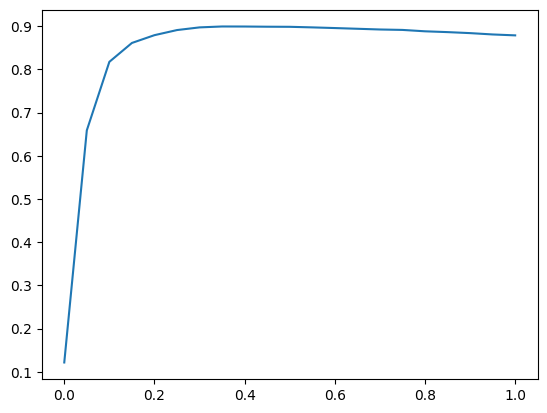

In [197]:
plt.plot(thresholds, scores)

In [199]:
from sklearn.metrics import roc_auc_score

In [200]:
roc_auc_score(y_val, y_pred)

np.float64(0.9008607841410824)

In [208]:
#Get the best C-parameter by evaluating ROC Curve
# Best C = 1
auc_score = []
c_list = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
for c in c_list:
    model = LogisticRegression(solver='newton-cg', C=c, max_iter=100)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    auc_score.append(auc)
    print(f'C={c}  AUC={auc}')

C=0.001  AUC=0.8786854062224277
C=0.01  AUC=0.8988633091017818
C=0.1  AUC=0.9014000783260601
C=0.5  AUC=0.9009492907547734
C=1  AUC=0.9008607841410824
C=5  AUC=0.9007237823232573
C=10  AUC=0.9007699846099381


In [271]:
# AUC on test dataset
model = LogisticRegression(solver='newton-cg', C=1, max_iter=100)
model.fit(X_train, y_train)
y_pred_tst = model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred_tst)
auc_test

np.float64(0.9070466420022282)

### Decision tree

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [223]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [224]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.8298344559457185)

In [ ]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

In [227]:
# Get the best max_depth  - 8 
depths = [1, 2, 3, 4, 5, 6, 7,8,9,10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.673
   2 -> 0.744
   3 -> 0.758
   4 -> 0.770
   5 -> 0.830
   6 -> 0.840
   7 -> 0.842
   8 -> 0.854
   9 -> 0.841
  10 -> 0.820
  15 -> 0.725
  20 -> 0.655
None -> 0.711


In [230]:
scores = []

for s in [1, 5, 10, 15, 20, 500, 100, 200, 1000]:
    dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=s)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((depth, s, auc))
    print('%4s -> %.3f' % (s, auc))



   1 -> 0.853
   5 -> 0.861
  10 -> 0.868
  15 -> 0.871
  20 -> 0.875
 500 -> 0.879
 100 -> 0.877
 200 -> 0.875
1000 -> 0.857


In [272]:
# AUC on test dataset
model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=500)
model.fit(X_train, y_train)
y_pred_tst = model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred_tst)
auc_test

np.float64(0.8834307995686702)

### Random forest

In [231]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))
    print('%4s -> %.3f' % (n, auc))

  10 -> 0.886
  20 -> 0.909
  30 -> 0.915
  40 -> 0.918
  50 -> 0.920
  60 -> 0.921
  70 -> 0.922
  80 -> 0.922
  90 -> 0.922
 100 -> 0.923
 110 -> 0.923
 120 -> 0.924
 130 -> 0.924
 140 -> 0.924
 150 -> 0.924
 160 -> 0.924
 170 -> 0.924
 180 -> 0.924
 190 -> 0.924
 200 -> 0.924


In [237]:
scores = []
depths = [1, 2, 3, 4, 5, 6, 7,8,9,10, 15, 20, 25, 30, None]
for n in depths:
    rf = RandomForestClassifier(n_estimators=120 , max_depth=n ,random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))
    print('%4s -> %.3f' % (n, auc))

   1 -> 0.849
   2 -> 0.871
   3 -> 0.878
   4 -> 0.892
   5 -> 0.901
   6 -> 0.906
   7 -> 0.912
   8 -> 0.914
   9 -> 0.917
  10 -> 0.919
  15 -> 0.924
  20 -> 0.925
  25 -> 0.923
  30 -> 0.924
None -> 0.924


In [273]:
# AUC on test dataset
model = RandomForestClassifier(n_estimators=120 , max_depth=20 ,random_state=1)
model.fit(X_train, y_train)
y_pred_tst = model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred_tst)
auc_test

np.float64(0.9299322621579598)

In [275]:
# Get the best treeshold to convert probabilty into target
# Best treshold is 0.45 

model = RandomForestClassifier(n_estimators=120 , max_depth=20 ,random_state=1)
model.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]


thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.5f' % (t, score))
    scores.append(score)

0.00 0.12143
0.05 0.73026
0.10 0.80712
0.15 0.84605
0.20 0.86386
0.25 0.87713
0.30 0.88841
0.35 0.89538
0.40 0.89947
0.45 0.90334
0.50 0.90290
0.55 0.90013
0.60 0.89737
0.65 0.89438
0.70 0.88863
0.75 0.88609
0.80 0.88222
0.85 0.87912
0.90 0.87901
0.95 0.87857
1.00 0.87857


### XGBoost

In [238]:
import xgboost as xgb

In [239]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [254]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [255]:
y_pred = model.predict(dval)

In [256]:
roc_auc_score(y_val, y_pred)

np.float64(0.9159928928730623)

In [259]:
#  best eta  = 0.7
for eta in [0.1 , 0.2, 0.3 , 0.4, 0.5 , 0.6 , 0.7, 0.8, 0.9]:
    xgb_params = {
    'eta': eta, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=10)
    y_pred = model.predict(dval)
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (eta, auc))
    
    

 0.1 -> 0.895
 0.2 -> 0.907
 0.3 -> 0.916
 0.4 -> 0.919
 0.5 -> 0.921
 0.6 -> 0.922
 0.7 -> 0.924
 0.8 -> 0.920
 0.9 -> 0.913


In [ ]:
#  best eta  = 0.7
eta  = 0.7

scores = []
for min_child_weight in [1,10,30]:
    for eta in [0.1 , 0.2, 0.3 , 0.4, 0.5 , 0.6 , 0.7, 0.8, 0.9]:    
        for max_depth in [1, 2, 3, 4, 5, 6, 7,8,9,10, 15, 20, 25, 30, None]:
            xgb_params = {
            'eta': eta, 
            'max_depth': max_depth,
            'min_child_weight': 1,
            
            'objective': 'binary:logistic',
            'nthread': 8,
            
            'seed': 1,
            'verbosity': 1,
            }
        
            model = xgb.train(xgb_params, dtrain, num_boost_round=10)
            y_pred = model.predict(dval)
            auc = roc_auc_score(y_val, y_pred)

            scores.append({
                'min_child_weight':min_child_weight,
                'eta':eta,
                'max_depth':max_depth,
                'auc':auc
            })
        
print(scores)

In [267]:
df_scores = pd.DataFrame(scores)
df_scores.sort_values(by = 'auc', ascending=False)

,min_child_weight,eta,max_depth,auc
230,10,0.7,6.0,0.923841
365,30,0.7,6.0,0.923841
239,10,0.7,NaN,0.923841
374,30,0.7,NaN,0.923841
104,1,0.7,NaN,0.923841
...,...,...,...,...
285,30,0.2,1.0,0.824419
150,10,0.2,1.0,0.824419
270,30,0.1,1.0,0.814461
135,10,0.1,1.0,0.814461


In [274]:

# min_child_weight = 10, eta=0.7, max_depth = 6.0

features = list(dv.get_feature_names_out())
# dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
# dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

xgb_params = {
            'eta': 0.7, 
            'max_depth': 6,
            'min_child_weight': 10,
            
            'objective': 'binary:logistic',
            'nthread': 8,
            
            'seed': 1,
            'verbosity': 1,
            }
        
model = xgb.train(xgb_params, dtrain, num_boost_round=10)
y_pred = model.predict(dtest)
auc = roc_auc_score(y_test, y_pred)

auc


np.float64(0.9259771943307538)

In [285]:
df[df['poutcome'] == 'success'].sort_values('previous', ascending=False)
# df.iloc[1] 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
43342,27,management,single,tertiary,no,6791.0,no,no,telephone,22,mar,174.0,2,229,28,success,0
44147,30,student,single,secondary,no,459.0,no,no,cellular,13,jul,98.0,2,210,22,success,0
39925,28,technician,single,tertiary,no,4987.0,no,no,cellular,2,jun,924.0,2,113,21,success,1
43052,77,retired,married,primary,no,2590.0,no,no,telephone,15,feb,112.0,5,94,15,success,0
44887,49,management,married,tertiary,no,1167.0,yes,yes,cellular,24,sep,249.0,1,91,14,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26463,34,management,married,tertiary,no,273.0,yes,no,cellular,20,nov,308.0,1,188,1,success,0
26100,40,management,married,tertiary,no,3352.0,yes,no,cellular,19,nov,639.0,2,27,1,success,1
25845,46,unemployed,divorced,secondary,no,3354.0,yes,no,cellular,19,nov,522.0,1,174,1,success,1
25714,54,services,married,unknown,no,386.0,no,yes,cellular,19,nov,74.0,1,152,1,success,0


In [287]:
df.iloc[43342].to_json()

'{"age":27,"job":"management","marital":"single","education":"tertiary","default":"no","balance":6791.0,"housing":"no","loan":"no","contact":"telephone","day":22,"month":"mar","duration":174.0,"campaign":2,"pdays":229,"previous":28,"poutcome":"success","target":0}'